# Week 3 - Seminar Tasks

## Agenda
- 7 tasks, 10-15 minutes each. 1 bonus task.
- Every 10-15 minutes I will reveal a solution to one of the tasks.
- Ask questions at any time.
- You don't have to wait for me to reveal the solution, just go through the notebook at your pace.
- Use scikit-learn for all modelling.


In [27]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# This prevents pandas from showing weird warnings
pd.options.mode.chained_assignment = None

In [28]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/intro-stat-learning/ISLP/main/ISLP/data/Credit.csv"
)

## Data preprocessing from Wednesday

In [29]:
df = df.rename(columns=str.lower)

df["gender"] = df["gender"].str.strip()
yesno_map = {"Yes": 1, "No": 0}
df["student"] = df["student"].map(yesno_map)
df["married"] = df["married"].map(yesno_map)
df["gender"] = (df["gender"] == "Male").astype(int)

df = df.drop(columns=["id"])

In [30]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=10)

In [31]:
y_train = df_train["balance"]

## Task 1

- Fit a simple linear model that predicts `balance` from `rating`. Give the model a unique name, like `model_rtg` (we'll use it later).
- Make predictions on training data `df_train`. Save them into a unique name as well, like `y_train_pred_rtg`.
- Plot the fitted line on a scatterplot.
- Make predictions on y_train and calculate mean squared error.


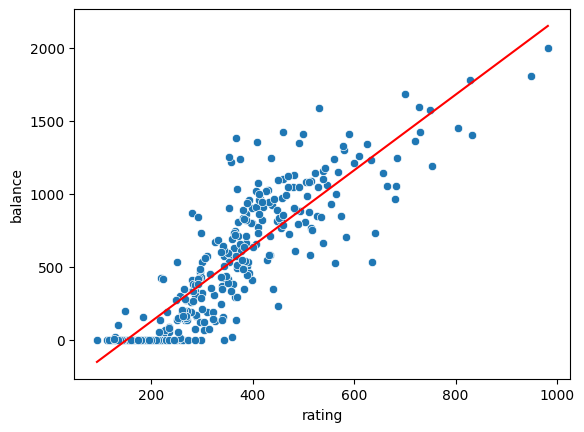

49991.60924204881


In [45]:
# Answer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_rtg = df_train[["rating"]]
model_rtg = LinearRegression()
model_rtg.fit(X_rtg, y_train)

y_pred_rtg = model_rtg.predict(X_rtg)

sns.scatterplot(data=df_train, x="rating", y="balance")
sns.lineplot(x=df_train["rating"], y=y_pred_rtg, color="red")
plt.show()

print(mean_squared_error(y_train, y_pred_rtg))


## Task 2

Fit a model that predicts `balance` from `rating` and `income`. Calculate mean squared error on the training set. Give your model a unique name.


In [36]:
# Answer
X_rtg_inc = df_train[["rating", "income"]]
model_rtg_inc = LinearRegression()
model_rtg_inc.fit(X_rtg_inc, y_train)

y_pred_rtg_inc = model_rtg_inc.predict(X_rtg_inc)
mean_squared_error(y_pred_rtg_inc, y_train)

25106.817564785488

## Task 3

Create two plots side by side on a single canvas. The plots should display the relationship between predicted and true `balance` values for the two models you fitted so far. On the Y axis, all plots should have the true `balance` from y_train. On the x-axis, the plots should have predicted values from both models.

Comment what you see.


Text(0, 0.5, 'Balance')

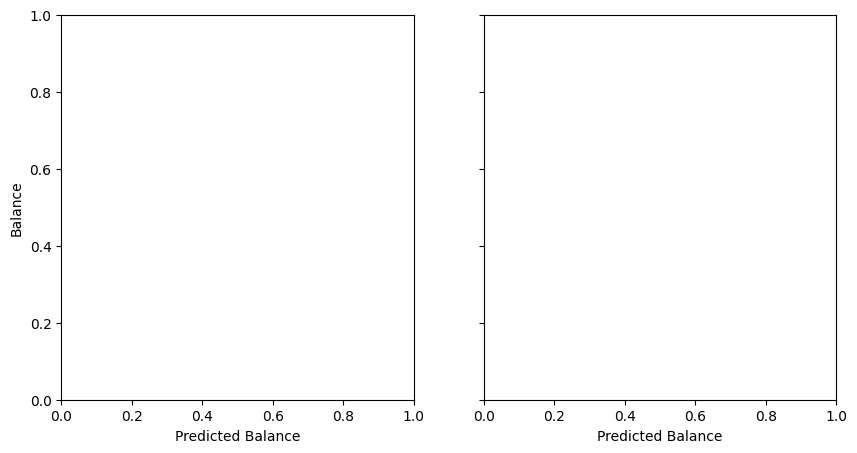

In [37]:
# Hint
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax1.set_xlabel("Predicted Balance")
ax2.set_xlabel("Predicted Balance")
ax1.set_ylabel("Balance")

Text(0.5, 1.0, 'Model 2')

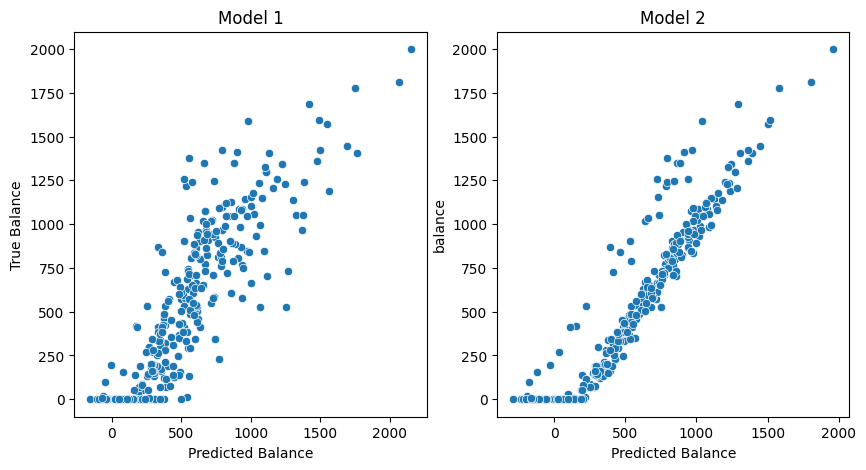

In [12]:
# Answer
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x=y_pred_rtg, y=y_train, ax=ax1)
ax1.set_xlabel("Predicted Balance")
ax1.set_ylabel("True Balance")
ax1.set_title("Model 1")

sns.scatterplot(x=y_pred_rtg_inc, y=y_train, ax=ax2)
ax2.set_xlabel("Predicted Balance")
ax2.set_title("Model 2")

## Task 4

Create a model that uses the same three features as above, plus `student`. Calculate mean squared error on the training set. Give the model a unique name. Make predictions on training data and save them into a unique variable.


In [13]:
# Answer
X_rtg_inc_stud = df_train[["rating", "income", "student"]]

model_rtg_inc_stud = LinearRegression()
model_rtg_inc_stud.fit(X_rtg_inc_stud, y_train)

y_pred_rtg_inc_stud = model_rtg_inc_stud.predict(X_rtg_inc_stud)

mean_squared_error(y_pred_rtg_inc_stud, y_train)

10554.411462981607

## Task 5

Now create the same plot as in Task 3, but add a third plot showing predictions against true values of the model you fitted in Task 4.

Comment what you see.


Text(0.5, 1.0, 'Model 3')

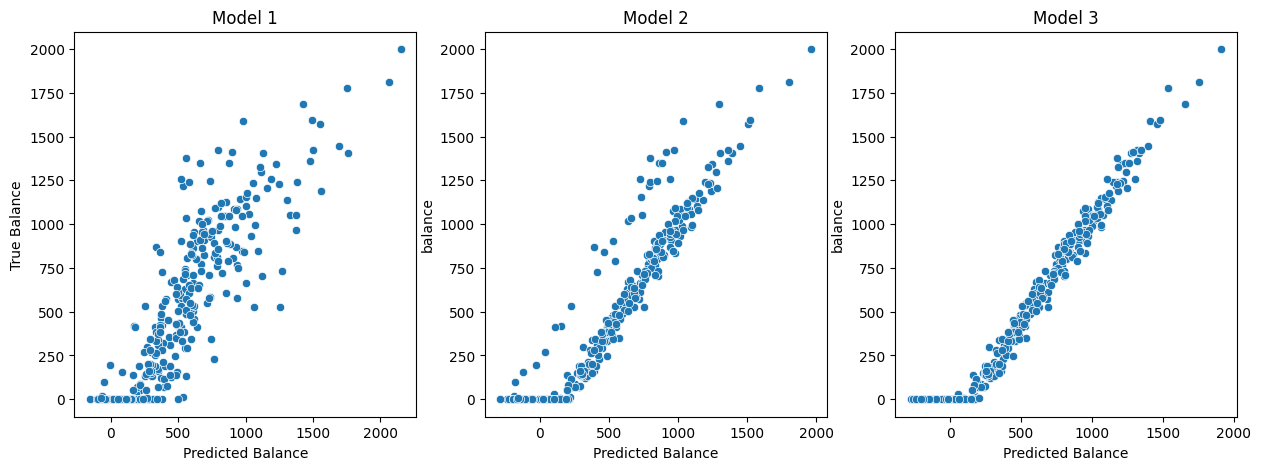

In [38]:
# Answer
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=y_pred_rtg, y=y_train, ax=ax1)
ax1.set_xlabel("Predicted Balance")
ax1.set_ylabel("True Balance")
ax1.set_title("Model 1")

sns.scatterplot(
    x=y_pred_rtg_inc,
    y=y_train,
    #  hue=df_train["student"],
    ax=ax2,
)
ax2.set_xlabel("Predicted Balance")
ax2.set_title("Model 2")

sns.scatterplot(x=y_pred_rtg_inc_stud, y=y_train, ax=ax3)
ax3.set_xlabel("Predicted Balance")
ax3.set_title("Model 3")


### Task 6

Create two new models:
1. Model that uses `rating` and `income` (like in Task 2), but with second-degree polynomial features.
2. Same, but with 3rd degree polynomial features.

Use scikit-learn's `PolynomialFeatures`.


In [46]:
# Answer
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_rtg_inc_poly_2 = poly2.fit_transform(X_rtg_inc)
model_rtg_inc_poly_2 = LinearRegression()
model_rtg_inc_poly_2.fit(X_rtg_inc_poly_2, y_train)
y_pred_rtg_inc_poly_2 = model_rtg_inc_poly_2.predict(X_rtg_inc_poly_2)

poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_rtg_inc_poly_3 = poly3.fit_transform(X_rtg_inc)
model_rtg_inc_poly_3 = LinearRegression()
model_rtg_inc_poly_3.fit(X_rtg_inc_poly_3, y_train)
y_pred_rtg_inc_poly_3 = model_rtg_inc_poly_3.predict(X_rtg_inc_poly_3)

## Task 7

Create a table with the following columns: `model_name`, `train_mse`,  `val_mse`. It should contain training and validation mean squared error for the three models that have `rating` and `income` features. Training error you have calculated for every model (by calculating MSE between `y_pred` and `y_train`). To calculate the validation error:
1. make predictions on the necessary features from `val_df` using the already fitted model (you do not need to call fit again)
2. create `y_val` which contains the target variable `balance` from `val_df`
3. Build the table

Answer the following:
1. Out of the three models that use `income` and `rating` features, which performs the best? Why?



In [47]:
# Answer
all_mse = []
y_val = df_val["balance"]

# Rating and income model
model_name = "model_rtg_inc"
train_mse = mean_squared_error(y_pred_rtg_inc, y_train)
y_val_pred = model_rtg_inc.predict(df_val[["rating", "income"]])
val_mse = mean_squared_error(y_val_pred, y_val)
all_mse.append({"model_name": model_name, "train_mse": train_mse, "val_mse": val_mse})

# Polynomial models
model_name = "model_rtg_inc_poly_2"
train_mse = mean_squared_error(y_pred_rtg_inc_poly_2, y_train)
X_val = poly2.transform(df_val[["rating", "income"]])
y_val_pred = model_rtg_inc_poly_2.predict(X_val)
val_mse = mean_squared_error(y_val_pred, y_val)
all_mse.append({"model_name": model_name, "train_mse": train_mse, "val_mse": val_mse})

model_name = "model_rtg_inc_poly_3"
train_mse = mean_squared_error(y_pred_rtg_inc_poly_3, y_train)
X_val = poly3.transform(df_val[["rating", "income"]])
y_val_pred = model_rtg_inc_poly_3.predict(X_val)
val_mse = mean_squared_error(y_val_pred, y_val)
all_mse.append({"model_name": model_name, "train_mse": train_mse, "val_mse": val_mse})

pd.DataFrame(all_mse).round(2)


,model_name,train_mse,val_mse
0,model_rtg_inc,25106.82,31470.12
1,model_rtg_inc_poly_2,21231.94,28165.11
2,model_rtg_inc_poly_3,17996.65,28762.25


## Task 8 [Bonus]

Create a plot that shows how training and validation MSE changes as a function of the degree of the polynomial of the model. Use  `rating` and `limit` as predictors.


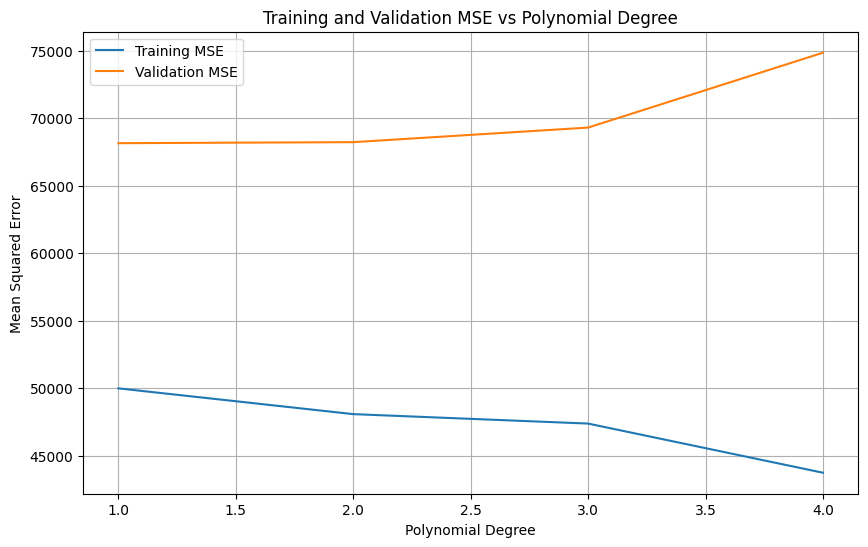

In [49]:
# Answer
degrees = range(1, 5) 
train_mses = []
val_mses = []
X = ["rating", "limit"]

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(df_train[X])
    X_val_poly = poly.transform(df_val[X])
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    train_mses.append(mean_squared_error(y_train, y_train_pred))
    val_mses.append(mean_squared_error(y_val, y_val_pred))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mses, label='Training MSE')
plt.plot(degrees, val_mses, label='Validation MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE vs Polynomial Degree')
plt.legend()
plt.grid()
